# 第3スクリーニング　財務分析によるスコアリング

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams['font.family'] = 'IPAexGothic'
from sklearn.preprocessing import scale
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis as FA

In [2]:
#データの読み込み

#### 一般企業財務 ####

data1 = pd.read_csv("/Users/shintaro/Downloads/第3スクリーニング　財務データ/第3スクリーニング　財務単年度.csv", encoding = 'Shift_JIS')

data2 = pd.read_csv("/Users/shintaro/Downloads/財務データ修正/財務データ連結優先.csv", encoding = 'Shift_JIS')

data3 = pd.read_csv("/Users/shintaro/Downloads/財務データ京セラー日本郵船/財務1京セラー日本郵船.csv", encoding = 'Shift_JIS')

data4 = pd.read_csv("/Users/shintaro/Downloads/財務データ　修正/財務データ .csv", encoding = 'Shift_JIS')

####################


#### 一般企業財務（5年） ####

data5 = pd.read_csv("/Users/shintaro/Downloads/第3スクリーニング　財務データ/第3スクリーニング　財務5年度.csv", encoding = 'Shift_JIS')

data6 = pd.read_csv("/Users/shintaro/Downloads/財務データ修正/5年間連結優先.csv", encoding = 'Shift_JIS')

data7 = pd.read_csv("/Users/shintaro/Downloads/財務データ京セラー日本郵船/財務2京セラー日本郵船.csv", encoding = 'Shift_JIS')

data8 = pd.read_csv("/Users/shintaro/Downloads/財務データ　修正/5年 .csv", encoding = 'Shift_JIS')

##########################

#### 一般企業財務（2年） ####

data9 = pd.read_csv("/Users/shintaro/Downloads/第3スクリーニング　財務データ/第3スクリーニング　売上債権.csv", encoding = 'Shift_JIS')

data10 = pd.read_csv("/Users/shintaro/Downloads/財務データ修正/2年間連結優先.csv", encoding = 'Shift_JIS')

data11 = pd.read_csv("/Users/shintaro/Downloads/財務データ京セラー日本郵船/財務3京セラー日本郵船.csv", encoding = 'Shift_JIS')

data12 = pd.read_csv("/Users/shintaro/Downloads/財務データ　修正/2年 .csv", encoding = 'Shift_JIS')

##########################

#### 株式　####

data13 = pd.read_csv("/Users/shintaro/Downloads/第3スクリーニング　財務データ/第3スクリーニング　株式時価総額.csv", encoding = 'Shift_JIS')

data14 = pd.read_csv("/Users/shintaro/Downloads/財務データ修正/時価総額.csv", encoding = 'Shift_JIS')

data15 = pd.read_csv("/Users/shintaro/Downloads/財務データ京セラー日本郵船/株式1京セラー日本郵船.csv", encoding = 'Shift_JIS')

data16 = pd.read_csv("/Users/shintaro/Downloads/財務データ　修正/時価総額.csv", encoding = 'Shift_JIS')

data17 = pd.read_csv("/Users/shintaro/Downloads/第3スクリーニング　財務データ/第3スクリーニング　株式終値.csv", encoding = 'Shift_JIS')

data18 = pd.read_csv("/Users/shintaro/Downloads/財務データ修正/終値.csv", encoding = 'Shift_JIS')

data19 = pd.read_csv("/Users/shintaro/Downloads/財務データ京セラー日本郵船/株式2京セラー日本郵船.csv", encoding = 'Shift_JIS')

data20 = pd.read_csv("/Users/shintaro/Downloads/財務データ　修正/終値.csv", encoding = 'Shift_JIS')

##############

In [3]:
#データの連結

l1_comp = data1['企業名称'].tolist()
l1_1 = data1['<基本項目>１株当たり配当金（累計）'].tolist()
l1_2 = data1['<貸借対照表（資産）>流動資産'].tolist()
l1_3 = data1['<貸借対照表（資産）>棚卸資産'].tolist()
l1_4 = data1['<貸借対照表（資産）>固定資産／非流動資産'].tolist()
l1_5 = data1['<貸借対照表（資産）>資産合計'].tolist()
l1_6 = data1['<貸借対照表（負債）>流動負債'].tolist()
l1_7 = data1['<貸借対照表（負債）>支払手形・買掛金／買掛金及びその他の短期債務'].tolist()
l1_8 = data1['<貸借対照表（純資産）>純資産合計／資本合計'].tolist()
l1_9 = data1['<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本'].tolist()
l1_10 = data1['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l1_11 = data1['<損益計算書（期首からの累計期間）>売上原価・営業原価［累計］'].tolist()
l1_12 = data1['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l1_13 = data1['<損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］'].tolist()
l1_14 = data1['<損益計算書（期首からの累計期間）>【ＩＦＲＳ】研究開発費［累計］'].tolist()

l2_comp = data2['企業名称'].tolist()
l2_1 = data2['<基本項目>１株当たり配当金（累計）'].tolist()
l2_2 = data2['<貸借対照表（資産）>流動資産'].tolist()
l2_3 = data2['<貸借対照表（資産）>棚卸資産'].tolist()
l2_4 = data2['<貸借対照表（資産）>固定資産／非流動資産'].tolist()
l2_5 = data2['<貸借対照表（資産）>資産合計'].tolist()
l2_6 = data2['<貸借対照表（負債）>流動負債'].tolist()
l2_7 = data2['<貸借対照表（負債）>支払手形・買掛金／買掛金及びその他の短期債務'].tolist()
l2_8 = data2['<貸借対照表（純資産）>純資産合計／資本合計'].tolist()
l2_9 = data2['<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本'].tolist()
l2_10 = data2['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l2_11 = data2['<損益計算書（期首からの累計期間）>売上原価・営業原価［累計］'].tolist()
l2_12 = data2['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l2_13 = data2['<損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］'].tolist()
l2_14 = data2['<損益計算書（期首からの累計期間）>【ＩＦＲＳ】研究開発費［累計］'].tolist()

l3_comp = data3['企業名称'].tolist()
l3_1 = data3['<基本項目>１株当たり配当金（累計）'].tolist()
l3_2 = data3['<貸借対照表（資産）>流動資産'].tolist()
l3_3 = data3['<貸借対照表（資産）>棚卸資産'].tolist()
l3_4 = data3['<貸借対照表（資産）>固定資産／非流動資産'].tolist()
l3_5 = data3['<貸借対照表（資産）>資産合計'].tolist()
l3_6 = data3['<貸借対照表（負債）>流動負債'].tolist()
l3_7 = data3['<貸借対照表（負債）>支払手形・買掛金／買掛金及びその他の短期債務'].tolist()
l3_8 = data3['<貸借対照表（純資産）>純資産合計／資本合計'].tolist()
l3_9 = data3['<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本'].tolist()
l3_10 = data3['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l3_11 = data3['<損益計算書（期首からの累計期間）>売上原価・営業原価［累計］'].tolist()
l3_12 = data3['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l3_13 = data3['<損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］'].tolist()
l3_14 = data3['<損益計算書（期首からの累計期間）>【ＩＦＲＳ】研究開発費［累計］'].tolist()

l4_comp = data4['企業名称'].tolist()
l4_1 = data4['<基本項目>１株当たり配当金（累計）'].tolist()
l4_2 = data4['<貸借対照表（資産）>流動資産'].tolist()
l4_3 = data4['<貸借対照表（資産）>棚卸資産'].tolist()
l4_4 = data4['<貸借対照表（資産）>固定資産／非流動資産'].tolist()
l4_5 = data4['<貸借対照表（資産）>資産合計'].tolist()
l4_6 = data4['<貸借対照表（負債）>流動負債'].tolist()
l4_7 = data4['<貸借対照表（負債）>支払手形・買掛金／買掛金及びその他の短期債務'].tolist()
l4_8 = data4['<貸借対照表（純資産）>純資産合計／資本合計'].tolist()
l4_9 = data4['<貸借対照表（純資産）>自己資本／親会社の所有者に帰属する資本'].tolist()
l4_10 = data4['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l4_11 = data4['<損益計算書（期首からの累計期間）>売上原価・営業原価［累計］'].tolist()
l4_12 = data4['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l4_13 = data4['<損益計算書（期首からの累計期間）>親会社株主に帰属する当期純利益（連結）／当期利益（単独）［累計］'].tolist()
l4_14 = data4['<損益計算書（期首からの累計期間）>【ＩＦＲＳ】研究開発費［累計］'].tolist()

l_comp = l1_comp + l2_comp + l3_comp + l4_comp
l_1 = l1_1 + l2_1 + l3_1 + l4_1
l_2 = l1_2 + l2_2 + l3_2 + l4_2
l_3 = l1_3 + l2_3 + l3_3 + l4_3
l_4 = l1_4 + l2_4 + l3_4 + l4_4
l_5 = l1_5 + l2_5 + l3_5 + l4_5
l_6 = l1_6 + l2_6 + l3_6 + l4_6
l_7 = l1_7 + l2_7 + l3_7 + l4_7
l_8 = l1_8 + l2_8 + l3_8 + l4_8
l_9 = l1_9 + l2_9 + l3_9 + l4_9
l_10 = l1_10 + l2_10 + l3_10 + l4_10
l_11 = l1_11 + l2_11 + l3_11 + l4_11
l_12 = l1_12 + l2_12 + l3_12 + l4_12
l_13 = l1_13 + l2_13 + l3_13 + l4_13
l_14 = l1_14 + l2_14 + l3_14 + l4_14


l5_comp = data5['企業名称'].tolist()
l5_1 = data5['<貸借対照表（資産）>資産合計'].tolist()
l5_2 = data5['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l5_3 = data5['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l5_4 = data5['<基本項目>１株当たり利益［累計］'].tolist()

l6_comp = data6['企業名称'].tolist()
l6_1 = data6['<貸借対照表（資産）>資産合計'].tolist()
l6_2 = data6['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l6_3 = data6['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l6_4 = data6['<基本項目>１株当たり利益［累計］'].tolist()

l7_comp = data7['企業名称'].tolist()
l7_1 = data7['<貸借対照表（資産）>資産合計'].tolist()
l7_2 = data7['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l7_3 = data7['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l7_4 = data7['<基本項目>１株当たり利益［累計］'].tolist()

l8_comp = data8['企業名称'].tolist()
l8_1 = data8['<貸借対照表（資産）>資産合計'].tolist()
l8_2 = data8['<損益計算書（期首からの累計期間）>売上高・営業収益［累計］'].tolist()
l8_3 = data8['<損益計算書（期首からの累計期間）>営業利益［累計］'].tolist()
l8_4 = data8['<基本項目>１株当たり利益［累計］'].tolist()

L_comp_5 = l5_comp + l6_comp + l7_comp + l8_comp
L_1_5 = l5_1 + l6_1 + l7_1 + l8_1
L_2_5 = l5_2 + l6_2 + l7_2 + l8_2
L_3_5 = l5_3 + l6_3 + l7_3 + l8_3
L_4_5 = l5_4 + l6_4 + l7_4 + l8_4

l9_comp = data9['企業名称'].tolist()
l9_1 = data9['<貸借対照表（資産）>受取手形・売掛金／売掛金及びその他の短期債権'].tolist()

l10_comp = data10['企業名称'].tolist()
l10_1 = data10['<貸借対照表（資産）>受取手形・売掛金／売掛金及びその他の短期債権'].tolist()

l11_comp = data11['企業名称'].tolist()
l11_1 = data11['<貸借対照表（資産）>受取手形・売掛金／売掛金及びその他の短期債権'].tolist()

l12_comp = data12['企業名称'].tolist()
l12_1 = data12['<貸借対照表（資産）>受取手形・売掛金／売掛金及びその他の短期債権'].tolist()

L_comp = l9_comp + l10_comp + l11_comp + l12_comp
L_1 = l9_1 + l10_1 + l11_1 + l12_1

s13_comp = data13['銘柄名称'].tolist()
s13_1 = data13['時価総額（発行済み株式数ベース）'].tolist()

s14_comp = data14['銘柄名称'].tolist()
s14_1 = data14['時価総額（発行済み株式数ベース）'].tolist()

s15_comp = data15['銘柄名称'].tolist()
s15_1 = data15['時価総額（発行済み株式数ベース）'].tolist()

s16_comp = data16['銘柄名称'].tolist()
s16_1 = data16['時価総額（発行済み株式数ベース）'].tolist()

s_comp = s13_comp + s14_comp + s15_comp + s16_comp
s_1 = s13_1 + s14_1 + s15_1 + s16_1


s17_comp = data17['銘柄名称'].tolist()
s17_1 = data17['終値'].tolist()

s18_comp = data18['銘柄名称'].tolist()
s18_1 = data18['終値'].tolist()

s19_comp = data19['銘柄名称'].tolist()
s19_1 = data19['終値'].tolist()

s20_comp = data20['銘柄名称'].tolist()
s20_1 = data20['終値'].tolist()

S_comp = s17_comp + s18_comp + s19_comp + s20_comp
S_1 = s17_1 + s18_1 + s19_1 + s20_1

In [4]:
slice_1_2017 = []

for i in range(0, len(L_1_5), 5):
    slice_1_2017.append(L_1_5[i])
    
slice_1_2018 = []

for i in range(1, len(L_1_5), 5):
    slice_1_2018.append(L_1_5[i])

slice_1_2019 = []

for i in range(2, len(L_1_5), 5):
    slice_1_2019.append(L_1_5[i])
    
slice_1_2020 = []

for i in range(3, len(L_1_5), 5):
    slice_1_2020.append(L_1_5[i])
    
slice_1_2021 = []

for i in range(4, len(L_1_5), 5):
    slice_1_2021.append(L_1_5[i])
    
    
    
slice_2_2017 = []

for i in range(0, len(L_2_5), 5):
    slice_2_2017.append(L_2_5[i])
    
slice_2_2018 = []

for i in range(1, len(L_2_5), 5):
    slice_2_2018.append(L_2_5[i])

slice_2_2019 = []

for i in range(2, len(L_2_5), 5):
    slice_2_2019.append(L_2_5[i])
    
slice_2_2020 = []

for i in range(3, len(L_2_5), 5):
    slice_2_2020.append(L_2_5[i])
    
slice_2_2021 = []

for i in range(4, len(L_2_5), 5):
    slice_2_2021.append(L_2_5[i])
    

    
slice_3_2017 = []

for i in range(0, len(L_3_5), 5):
    slice_3_2017.append(L_3_5[i])
    
slice_3_2018 = []

for i in range(1, len(L_3_5), 5):
    slice_3_2018.append(L_3_5[i])

slice_3_2019 = []

for i in range(2, len(L_3_5), 5):
    slice_3_2019.append(L_3_5[i])
    
slice_3_2020 = []

for i in range(3, len(L_3_5), 5):
    slice_3_2020.append(L_3_5[i])
    
slice_3_2021 = []

for i in range(4, len(L_3_5), 5):
    slice_3_2021.append(L_3_5[i])
    
    
    
slice_4_2017 = []

for i in range(0, len(L_4_5), 5):
    slice_4_2017.append(L_4_5[i])
    
slice_4_2018 = []

for i in range(1, len(L_4_5), 5):
    slice_4_2018.append(L_4_5[i])

slice_4_2019 = []

for i in range(2, len(L_4_5), 5):
    slice_4_2019.append(L_4_5[i])
    
slice_4_2020 = []

for i in range(3, len(L_4_5), 5):
    slice_4_2020.append(L_4_5[i])
    
slice_4_2021 = []

for i in range(4, len(L_4_5), 5):
    slice_4_2021.append(L_4_5[i])

In [5]:
slice_5_2020 = []

for i in range(0, len(L_1), 2):
    slice_5_2020.append(L_1[i])
    
slice_5_2021 = []

for i in range(1, len(L_1), 2):
    slice_5_2021.append(L_1[i])

In [6]:
l = len(l_1)
l_15 = []

for i in range(l):
    l_15.append(l_13[i] * 1000000)
    
l_16 = []

for i in range(l):
    l_16.append(l_8[i] * 1000000)

In [7]:
l_comp_unique = list(dict.fromkeys(l_comp))
L_comp_5_unique = list(dict.fromkeys(L_comp_5))
L_comp_unique = list(dict.fromkeys(L_comp))
s_comp_unique = list(dict.fromkeys(s_comp))
S_comp_unique = list(dict.fromkeys(S_comp))

l_comp_unique == L_comp_5_unique == L_comp_unique == s_comp_unique == S_comp_unique

True

In [8]:
l = len(l_1)

In [9]:
len(L_comp_5_unique)

40


### 収益性

In [10]:
#ROE
ROE = []

for i in range(l):
    ROE.append((l_13[i] / l_9[i]) * 100)

#ROA
ROA = []

for i in range(l):
    ROA.append((l_12[i] / l_5[i]) * 100)
    
#売上高営業利益率
p = []

for i in range(l):
    p.append((l_12[i] / l_10[i]) * 100)

### 安全性

In [11]:
#短期
#当座比率
safe_1 = []

for i in range(l):
    safe_1.append(((l_2[i] - l_3[i]) / l_6[i]) * 100)

#長期
#自己資本比率
safe_2 = []

for i in range(l):
    safe_2.append((l_9[i] / l_5[i]) * 100)

#固定比率
safe_3 = []

for i in range(l):
    safe_3.append((l_4[i] / l_9[i]) * 100) 

### 成長性

In [12]:
#増収率
g_1 = []
g_1_2017 = []
g_1_2018 = []
g_1_2019 = []
g_1_2020 = []

for i in range(l):
    num = (((slice_2_2018[i] - slice_2_2017[i]) / slice_2_2017[i]) * 100)
    if np.isnan(num):
        num = 0
    g_1_2017.append(num)

for i in range(l):
    num = (((slice_2_2019[i] - slice_2_2018[i]) / slice_2_2018[i]) * 100)
    if np.isnan(num):
        num = 0
    g_1_2018.append(num)
    
for i in range(l):
    num = (((slice_2_2020[i] - slice_2_2019[i]) / slice_2_2019[i]) * 100)
    if np.isnan(num):
        num = 0
    g_1_2019.append(num)
    
for i in range(l):
    num = (((slice_2_2021[i] - slice_2_2020[i]) / slice_2_2020[i]) * 100)
    if np.isnan(num):
        num = 0
    g_1_2020.append(num)
    
for i in range(l):
    beta = []
    if g_1_2017[i] != 0:
        beta.append(g_1_2017[i])
    if g_1_2018[i] != 0:
        beta.append(g_1_2018[i])
    if g_1_2019[i] != 0:
        beta.append(g_1_2019[i])
    if g_1_2020[i] != 0:
        beta.append(g_1_2020[i])
    if len(beta) == 0:
        g_1.append(np.nan)
        
    else:
        g_1.append(((g_1_2017[i] + g_1_2018[i] + g_1_2019[i] + g_1_2020[i]) / len(beta)))
    
#増益率
g_2 = []
g_2_2017 = []
g_2_2018 = []
g_2_2019 = []
g_2_2020 = []

for i in range(l):
    num = (((slice_3_2018[i] - slice_3_2017[i]) / slice_3_2017[i]) * 100)
    if np.isnan(num):
        num = 0
    g_2_2017.append(num)

for i in range(l):
    num = (((slice_3_2019[i] - slice_3_2018[i]) / slice_3_2018[i]) * 100)
    if np.isnan(num):
        num = 0
    g_2_2018.append(num)
    
for i in range(l):
    num = (((slice_3_2020[i] - slice_3_2019[i]) / slice_3_2019[i]) * 100)
    if np.isnan(num):
        num = 0
    g_2_2019.append(num)    
    
for i in range(l):
    num = (((slice_3_2021[i] - slice_3_2020[i]) / slice_3_2020[i]) * 100)
    if np.isnan(num):
        num = 0
    g_2_2020.append(num)
    
for i in range(l):
    beta = []
    if g_2_2017[i] != 0:
        beta.append(g_2_2017[i])
    if g_2_2018[i] != 0:
        beta.append(g_2_2018[i])
    if g_2_2019[i] != 0:
        beta.append(g_2_2019[i])
    if g_2_2020[i] != 0:
        beta.append(g_2_2020[i])
    if len(beta) == 0:
        g_2.append(np.nan)
    
    else:
        g_2.append(((g_2_2017[i] + g_2_2018[i] + g_2_2019[i] + g_2_2020[i]) / len(beta)))

#総資本増加率
g_3 = []
g_3_2017 = []
g_3_2018 = []
g_3_2019 = []
g_3_2020 = []

for i in range(l):
    num = (((slice_1_2018[i] - slice_1_2017[i]) / slice_1_2017[i]) * 100)
    if np.isnan(num):
        num = 0
    g_3_2017.append(num)
                   
for i in range(l):
    num = (((slice_1_2019[i] - slice_1_2018[i]) / slice_1_2018[i]) * 100)
    if np.isnan(num):
        num = 0
    g_3_2018.append(num)
                   
for i in range(l):
    num = (((slice_1_2020[i] - slice_1_2019[i]) / slice_1_2019[i]) * 100)
    if np.isnan(num):
        num = 0
    g_3_2019.append(num)
                   
for i in range(l):
    num = (((slice_1_2021[i] - slice_1_2020[i]) / slice_1_2020[i]) * 100)
    if np.isnan(num):
        num = 0
    g_3_2020.append(num)
    
for i in range(l):
    beta = []
    if g_3_2017[i] != 0:
        beta.append(g_3_2017[i])
    if g_3_2018[i] != 0:
        beta.append(g_3_2018[i])
    if g_3_2019[i] != 0:
        beta.append(g_3_2019[i])
    if g_3_2020[i] != 0:
        beta.append(g_3_2020[i])
    if len(beta) == 0:
        g_3.append(np.nan)

    else:
        g_3.append(((g_3_2017[i] + g_3_2018[i] + g_3_2019[i] + g_3_2020[i]) / len(beta)))

#売上高研究開発費率
g_4 = []

for i in range(l):
    g_4.append((l_14[i] / l_10[i]) * 100)

In [13]:
#PER
PER = []

for i in range(l):
    PER.append(s_1[i] / l_15[i])

#PBR
PBR = []

for i in range(l):
    PBR.append(s_1[i] / l_16[i])

#PEG_ratio
growth_ratio = []
g_2017 = []
g_2018 = []
g_2019 = []
g_2020 = []

for i in range(l):
    num = (((slice_4_2018[i] - slice_4_2017[i])/ slice_4_2017[i])*100)
    if np.isnan(num):
        num = 0
    g_2017.append(num)
    
for i in range(l):
    num = (((slice_4_2019[i] - slice_4_2018[i])/ slice_4_2018[i])*100)
    if np.isnan(num):
        num = 0
    g_2018.append(num)
    
for i in range(l):
    num = (((slice_4_2020[i] - slice_4_2019[i])/ slice_4_2019[i])*100)
    if np.isnan(num):
        num = 0
    g_2019.append(num)
    
for i in range(l):
    num = (((slice_4_2021[i] - slice_4_2020[i])/ slice_4_2020[i])*100)
    if np.isnan(num):
        num = 0
    g_2020.append(num)
    
for i in range(l):
    beta = []
    if g_2017[i] != 0:
        beta.append(g_2017[i])
    if g_2018[i] != 0:
        beta.append(g_2018[i])
    if g_2019[i] != 0:
        beta.append(g_2019[i])
    if g_2020[i] != 0:
        beta.append(g_2020[i])
    
    if len(beta) == 0:
        growth_ratio.append(np.nan)
    
    else:
        growth_ratio.append((g_2017[i] + g_2018[i] + g_2019[i] + g_2020[i]) / len(beta))

PEG_ratio = []

for i in range(l):
    PEG_ratio.append(PER[i] / growth_ratio[i]) 

#配当利回り
c = []

for i in range(l):
    c.append((l_1[i] / S_1[i]) * 100)

### 効率性

In [14]:
#総資産回転率
e = []

for i in range(l):
    e.append(l_10[i] / l_5[i])

#キャッシュ・コンバージョン・サイクル
CCC = []
s_c_2021 = []
s_c_2020 = []

for i in range(l):
    num = slice_5_2021[i]
    if np.isnan(num):
        num = 0
    s_c_2021.append(num)
    
for i in range(l):
    num = slice_5_2020[i]
    if np.isnan(num):
        num = 0
    s_c_2020.append(num)
    
for i in range(l):
    beta = []
    if s_c_2021[i] != 0:
        beta.append(s_c_2021[i])
    if s_c_2020[i] != 0:
        beta.append(s_c_2020[i])
        
    if len(beta) == 0:
        CCC.append(np.nan)
        
    else:
        CCC.append(((((slice_5_2021[i] + slice_5_2020[i]) / len(beta)) / l_10[i]) * 365) + ((l_3[i] / l_11[i]) * 365) - ((l_7[i] / l_11[i]) * 365))

In [15]:
dict = {'企業名': l_comp, 'ROE': ROE, 'ROA': ROA, '売上高営業利益率': p, '当座比率': safe_1, '自己資本比率': safe_2, '固定比率': safe_3, '増収率': g_1, '増益率': g_2, '総資本増加率': g_3, '売上高研究開発費率': g_4, 'PER': PER, 'PBR': PBR, 'PEGレシオ': PEG_ratio, '配当利回り': c, '総資本回転率': e, 'キャッシュ・コンバージョン・サイクル': CCC}
df_tmp = pd.DataFrame(dict)

In [16]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [17]:
#df_tmp.to_csv('3rdscreening_Data(ver1.2).csv', encoding = 'Shift_JIS')

In [18]:
df_tmp

企業名        ROE        ROA   売上高営業利益率        当座比率  \
0                  富士通  13.977970   8.348176   7.419112  126.877302   
1               トヨタ自動車   9.593268   3.529547   8.075623   92.676329   
2                 キヤノン   3.235612   2.389888   3.498054   92.470681   
3                日立製作所  14.228130   4.177728   5.672687   93.321086   
4                 住友商事  -6.054983   0.625323   1.087736  119.216040   
5                 ローソン   3.246610   2.993636   6.137528   87.287595   
6                大日本印刷   2.403118   2.713890   3.708818  166.382113   
7                 三菱電機   7.012035   4.797807   5.492036  139.711475   
8              コニカミノルタ  -2.817436  -1.251470  -1.883989  106.359294   
9                 三井物産   7.339763   1.638259   2.559750  132.963976   
10                 味の素   9.579255   7.065030   9.437745  117.888797   
11               三井不動産   5.069710   2.632017  10.150163   51.679790   
12              パナソニック   6.363718   3.776796   3.860396  110.193173   
13                ＫＤＤＩ  13.687696   9.846824  19.527071   99.224317   
14               三菱重工業   2.974292   1.082976   1.408102   74.242216   
15             三菱総合研究所  13.175387   6.473564   6.771354  251.763054   
16                 リコー  -3.556658  -2.406365  -2.700781  131.818541   
17                  丸紅  12.387916   2.039975   2.235372   88.903234   
18                  東芝   9.787692   2.982372   3.418113  131.896411   
19                三菱商事   3.073759   1.112956   1.609676  105.766375   
20                 京セラ   3.481264   2.022173   4.626638  202.058399   
21                  鈴木   7.218361   6.995603   6.165114  130.790092   
22            アウトソーシング   5.278117   4.733667   3.909618  104.652249   
23                日本航空 -30.259146 -18.526925 -81.129202  114.100228   
24                関西電力   6.469349   1.804735   4.713041   46.941447   
25               川崎重工業  -4.154444  -0.270212  -0.356402   68.319065   
26                 ヤマト   7.242111   6.937939   7.039550  213.302431   
27               ファンケル  11.361349  11.868803  10.074059  272.800378   
28                デンソー   3.213945   2.291877   3.141901  137.694899   
29                日本郵船  22.264617   3.365687   4.447673   92.366974   
30                 東洋紡   2.262436   5.427046   7.900571  103.962904   
31  西日本フィナンシャルホールディングス        NaN        NaN        NaN         NaN   
32                エーザイ   5.989764   4.749135   8.014032  169.217669   
33                住友林業   8.272443   4.349715   5.651039   94.797170   
34                富士電機  10.054269   4.619507   5.547837  125.139724   
35                静岡銀行        NaN        NaN        NaN         NaN   
36                日本通運   9.631030   4.785964   3.756261  148.131379   
37         ヤマトホールディングス   9.837465   8.451538   5.432089  135.116047   
38               日産自動車 -11.374988  -0.915696  -1.916052  136.924843   
39     アサヒグループホールディングス   6.122586   3.044728   6.665822   30.612620   

       自己資本比率        固定比率        増収率         増益率     総資本増加率  売上高研究開発費率  \
0   45.455967   90.826741  -3.435469   28.764538   0.005037   3.170625   
1   37.587317  168.729346  -0.182263    2.996422   6.430257   4.006762   
2   55.668956  110.152887  -8.088638  -26.374717  -3.805921   8.616806   
3   29.743911  167.623022  -1.127712   -2.548084   5.586763   3.362280   
4   31.286584  181.269336   4.571572   -7.375786   1.018040   0.000000   
5   19.600639  252.068317   1.535426  -12.484139  13.676538   0.000000   
6   57.203624   97.626768  -1.331525   14.007577   1.232869   2.442867   
7   57.405968   70.833023  -0.197930   -3.004334   3.600659   4.546750   
8   41.537770  132.940165  -2.358693  -90.395159   6.883190   7.528542   
9   36.517071  181.785766  17.667752    4.951554   2.201250   0.000000   
10  43.335553  136.414261  -0.440025   15.133683   1.554947   2.417278   
11  33.013372  206.815758   4.190541   -2.014687   8.614329   0.036911   
12  37.885298  112.732755  -2.004629    1.260246   3.563574   6.266262   
13  45.178668  146.571605   2.868487    3.267020  14.279554   0.454222 

### リターン性によるスクリーニング

In [19]:
df = pd.read_csv("/Users/shintaro/Downloads/3rdscreening_Data(ver1.2).csv", encoding = 'Shift_JIS')
del df['Unnamed: 0']

In [20]:
marketcap = pd.read_csv("/Users/shintaro/Downloads/第2スクリーニング_検証.csv", encoding = 'Shift_JIS')

In [21]:
del marketcap['銘柄名称']
del marketcap['TOPIX']

In [22]:
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100

In [23]:
Return = R.mean().tolist()

In [24]:
l_comp2 = R.columns

In [25]:
dict = {'企業名': l_comp2, 'リターン': Return}
df1 = pd.DataFrame(dict)

In [26]:
len_df1 = len(df1)
len_df = len(df)

In [27]:
del_comp_list = []

for i in range(len_df):
    for j in range(len_df1):
        if df.at[i, '企業名'] == df1.at[j, '企業名']:
            if df1.at[j, 'リターン'] < 0:
                del_comp_list.append(i)

In [28]:
for i in range(len_df1):
    if df1.at[i, 'リターン'] < 0:
        print(df1.at[i, '企業名'])
        print(df1.at[i, 'リターン'])

マルシェ
-0.18725253394644098
キヤノン
-0.11392171677711053
ココナラ
-1.9287820176079684
コンコルディア・フィナンシャル
-0.14396655521606805
日本板硝子
-0.07509674572822099
アクセル
-0.5289794802764021
百十四銀行
-0.30097448821070794
碧
-0.4448922071328273
グローバルウェイ
-0.17311376641802576
西日本フィナンシャルホールディ
-0.7606357508543973
ワタミ
-0.12118035445840154
関西電力
-0.0791418754342908


In [29]:
for i in range(len(del_comp_list)):
    df.drop(del_comp_list[-(i+1)], inplace=True)

In [30]:
df

企業名        ROE        ROA   売上高営業利益率        当座比率  \
0                  富士通  13.977970   8.348176   7.419112  126.877302   
1               トヨタ自動車   9.593268   3.529547   8.075623   92.676329   
3                日立製作所  14.228130   4.177728   5.672687   93.321086   
4                 住友商事  -6.054983   0.625323   1.087736  119.216040   
5                 ローソン   3.246610   2.993636   6.137528   87.287595   
6                大日本印刷   2.403118   2.713890   3.708818  166.382113   
7                 三菱電機   7.012035   4.797807   5.492036  139.711475   
8              コニカミノルタ  -2.817436  -1.251470  -1.883989  106.359294   
9                 三井物産   7.339763   1.638259   2.559750  132.963976   
10                 味の素   9.579255   7.065030   9.437745  117.888797   
11               三井不動産   5.069710   2.632017  10.150163   51.679790   
12              パナソニック   6.363718   3.776796   3.860396  110.193173   
13                ＫＤＤＩ  13.687696   9.846824  19.527071   99.224317   
14               三菱重工業   2.974292   1.082976   1.408102   74.242216   
15             三菱総合研究所  13.175387   6.473564   6.771354  251.763054   
16                 リコー  -3.556658  -2.406365  -2.700781  131.818541   
17                  丸紅  12.387916   2.039975   2.235372   88.903234   
18                  東芝   9.787692   2.982372   3.418113  131.896411   
19                三菱商事   3.073759   1.112956   1.609676  105.766375   
20                 京セラ   3.481264   2.022173   4.626638  202.058399   
21                  鈴木   7.218361   6.995603   6.165114  130.790092   
22            アウトソーシング   5.278117   4.733667   3.909618  104.652249   
23                日本航空 -30.259146 -18.526925 -81.129202  114.100228   
25               川崎重工業  -4.154444  -0.270212  -0.356402   68.319065   
26                 ヤマト   7.242111   6.937939   7.039550  213.302431   
27               ファンケル  11.361349  11.868803  10.074059  272.800378   
28                デンソー   3.213945   2.291877   3.141901  137.694899   
29                日本郵船  22.264617   3.365687   4.447673   92.366974   
30                 東洋紡   2.262436   5.427046   7.900571  103.962904   
31  西日本フィナンシャルホールディングス        NaN        NaN        NaN         NaN   
32                エーザイ   5.989764   4.749135   8.014032  169.217669   
33                住友林業   8.272443   4.349715   5.651039   94.797170   
34                富士電機  10.054269   4.619507   5.547837  125.139724   
35                静岡銀行        NaN        NaN        NaN         NaN   
36                日本通運   9.631030   4.785964   3.756261  148.131379   
37         ヤマトホールディングス   9.837465   8.451538   5.432089  135.116047   
38               日産自動車 -11.374988  -0.915696  -1.916052  136.924843   
39     アサヒグループホールディングス   6.122586   3.044728   6.665822   30.612620   

       自己資本比率        固定比率        増収率         増益率     総資本増加率  売上高研究開発費率  \
0   45.455967   90.826741  -3.435469   28.764538   0.005037   3.170625   
1   37.587317  168.729346  -0.182263    2.996422   6.430257   4.006762   
3   29.743911  167.623022  -1.127712   -2.548084   5.586763   3.362280   
4   31.286584  181.269336   4.571572   -7.375786   1.018040   0.000000   
5   19.600639  252.068317   1.535426  -12.484139  13.676538   0.000000   
6   57.203624   97.626768  -1.331525   14.007577   1.232869   2.442867   
7   57.405968   70.833023  -0.197930   -3.004334   3.600659   4.546750   
8   41.537770  132.940165  -2.358693  -90.395159   6.883190   7.528542   
9   36.517071  181.785766  17.667752    4.951554   2.201250   0.000000   
10  43.335553  136.414261  -0.440025   15.133683   1.554947   2.417278   
11  33.013372  206.815758   4.190541   -2.014687   8.614329   0.036911   
12  37.885298  112.732755  -2.004629    1.260246   3.563574   6.266262   
13  45.178668  146.571605   2.868487    3.267020  14.279554   0.454222   
14  28.401986  172.435305  -1.287134  -14.309428  -3.195848   3.398077   
15  55.954620   74.685284   0.947648    3.808695   8.434734   1.131276   
16  48.745251   90.098082  -4.304450 -195.739102  -7.509592   5.3

In [31]:
dataframe = df

### 因子分析

In [32]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

ROE       ROA  売上高営業利益率     当座比率   自己資本比率     固定比率       増収率  \
count        36        36        36       36       36       36        36   
mean    5.21979   3.22527   2.58214  125.227   42.331  141.065   1.28883   
std     8.86649    4.8444   14.9155  49.6133  15.2766  55.4243   7.39489   
min    -30.2591  -18.5269  -81.1292  30.6126  19.6006  56.5758  -14.3145   
25%     3.04889   1.92619   2.47866  94.4281   30.996  95.7866  -2.09315   
50%     6.68788   3.44762   5.02936  118.552  37.8488  141.044  0.208366   
75%     9.80014   4.95512    6.8384  137.117  53.6473  174.644   3.07986   
max     22.2646   11.8688   19.5271    272.8  74.1788  253.744   27.3815   

            増益率    総資本増加率  売上高研究開発費率       PER       PBR     PEGレシオ    配当利回り  \
count        36        36         36        36        36         36       36   
mean   -5.16013    4.6614    3.02719   18.5989   1.46419   -1.36643  2.64436   
std     48.3854   6.98108    4.32432   22.7942   1.13835    7.72175  1.75564   
min    -195.739  -7.50959          0  -27.1063   0.51115   -33.2929        0   
25%       -7.38   1.20532  0.0778201   9.22609  0.779049  -0.242948   1.7311   
50%     3.13172    3.7443    2.43007     16.68   1.08378  0.0609576  2.30008   
75%     11.3593   7.01963    4.14176   26.4796    1.5656   0.800452  3.13078   
max     79.7705   34.8225    23.2682   78.8368   6.35155    11.8825  8.32639   

         総資本回転率 キャッシュ・コンバージョン・サイクル  
count        36                 35  
mean   0.775547            81.0528  
std    0.287878             77.258  
min    0.228363           -17.0669  
25%    0.588173             43.783  
50%    0.752661            59.1933  
75%    0.923447            109.738  
max     1.55585            424.676

In [33]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


array([[<AxesSubplot:xlabel='ROE', ylabel='ROE'>,
        <AxesSubplot:xlabel='ROA', ylabel='ROE'>,
        <AxesSubplot:xlabel='売上高営業利益率', ylabel='ROE'>,
        <AxesSubplot:xlabel='当座比率', ylabel='ROE'>,
        <AxesSubplot:xlabel='自己資本比率', ylabel='ROE'>,
        <AxesSubplot:xlabel='固定比率', ylabel='ROE'>,
        <AxesSubplot:xlabel='増収率', ylabel='ROE'>,
        <AxesSubplot:xlabel='増益率', ylabel='ROE'>,
        <AxesSubplot:xlabel='総資本増加率', ylabel='ROE'>,
        <AxesSubplot:xlabel='売上高研究開発費率', ylabel='ROE'>,
        <AxesSubplot:xlabel='PER', ylabel='ROE'>,
        <AxesSubplot:xlabel='PBR', ylabel='ROE'>,
        <AxesSubplot:xlabel='PEGレシオ', ylabel='ROE'>,
        <AxesSubplot:xlabel='配当利回り', ylabel='ROE'>,
        <AxesSubplot:xlabel='総資本回転率', ylabel='ROE'>,
        <AxesSubplot:xlabel='キャッシュ・コンバージョン・サイクル', ylabel='ROE'>],
       [<AxesSubplot:xlabel='ROE', ylabel='ROA'>,
        <AxesSubplot:xlabel='ROA', ylabel='ROA'>,
        <AxesSubplot:xlabel='売上高営業利益率', ylabel='ROA'>,
  

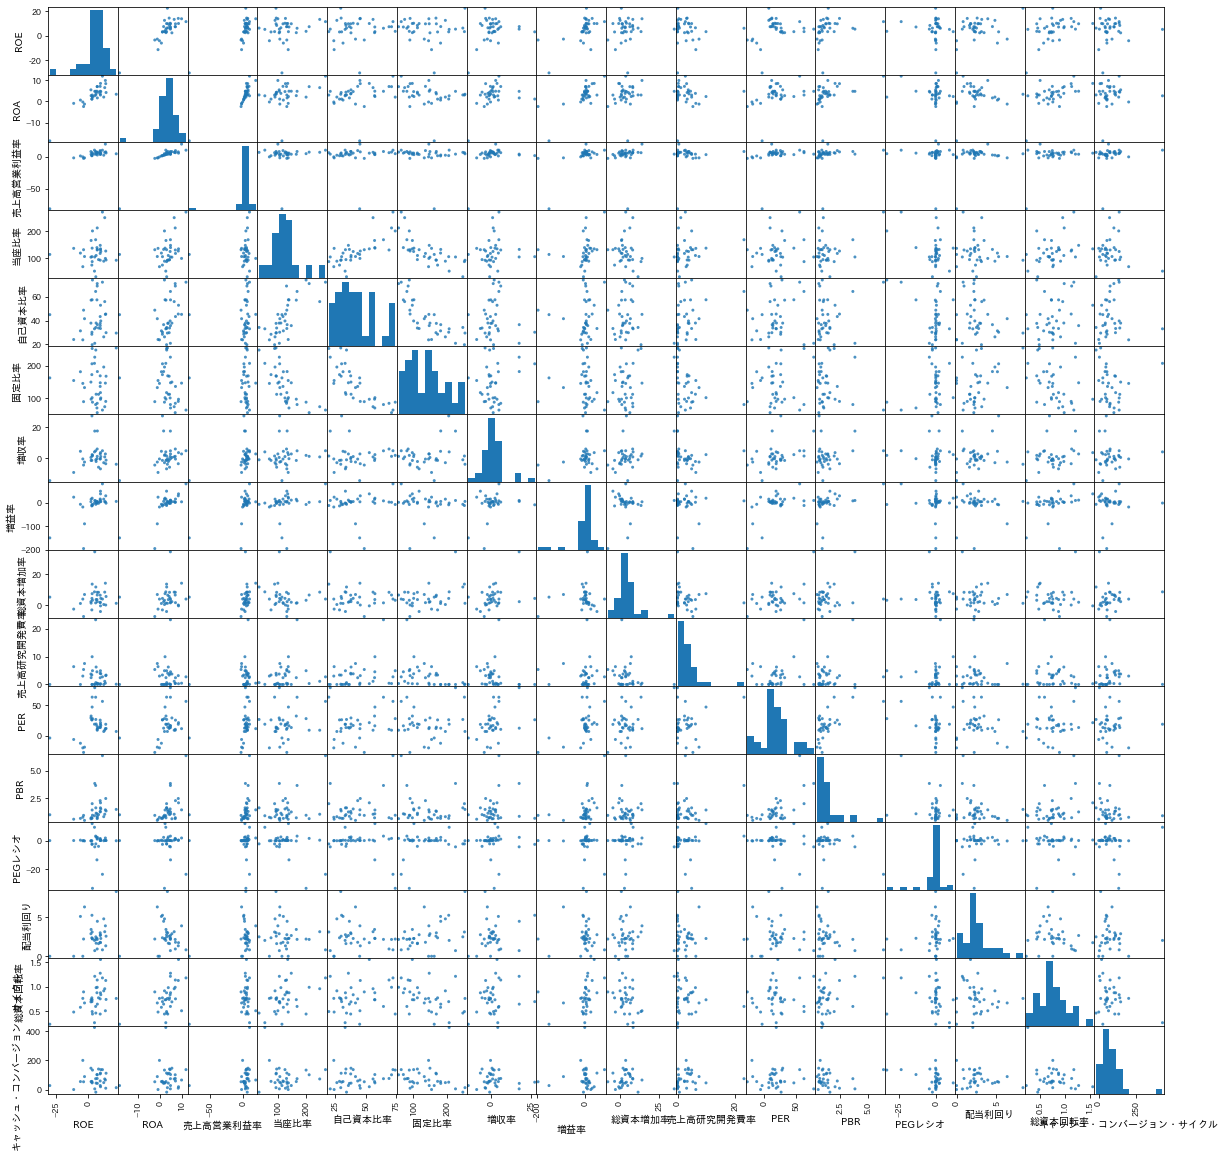

In [34]:
import japanize_matplotlib
from pandas import plotting

plotting.scatter_matrix(df, figsize = (20, 20), alpha = 0.8)
#plt.savefig('散布図行列.png', dpi = 1000)

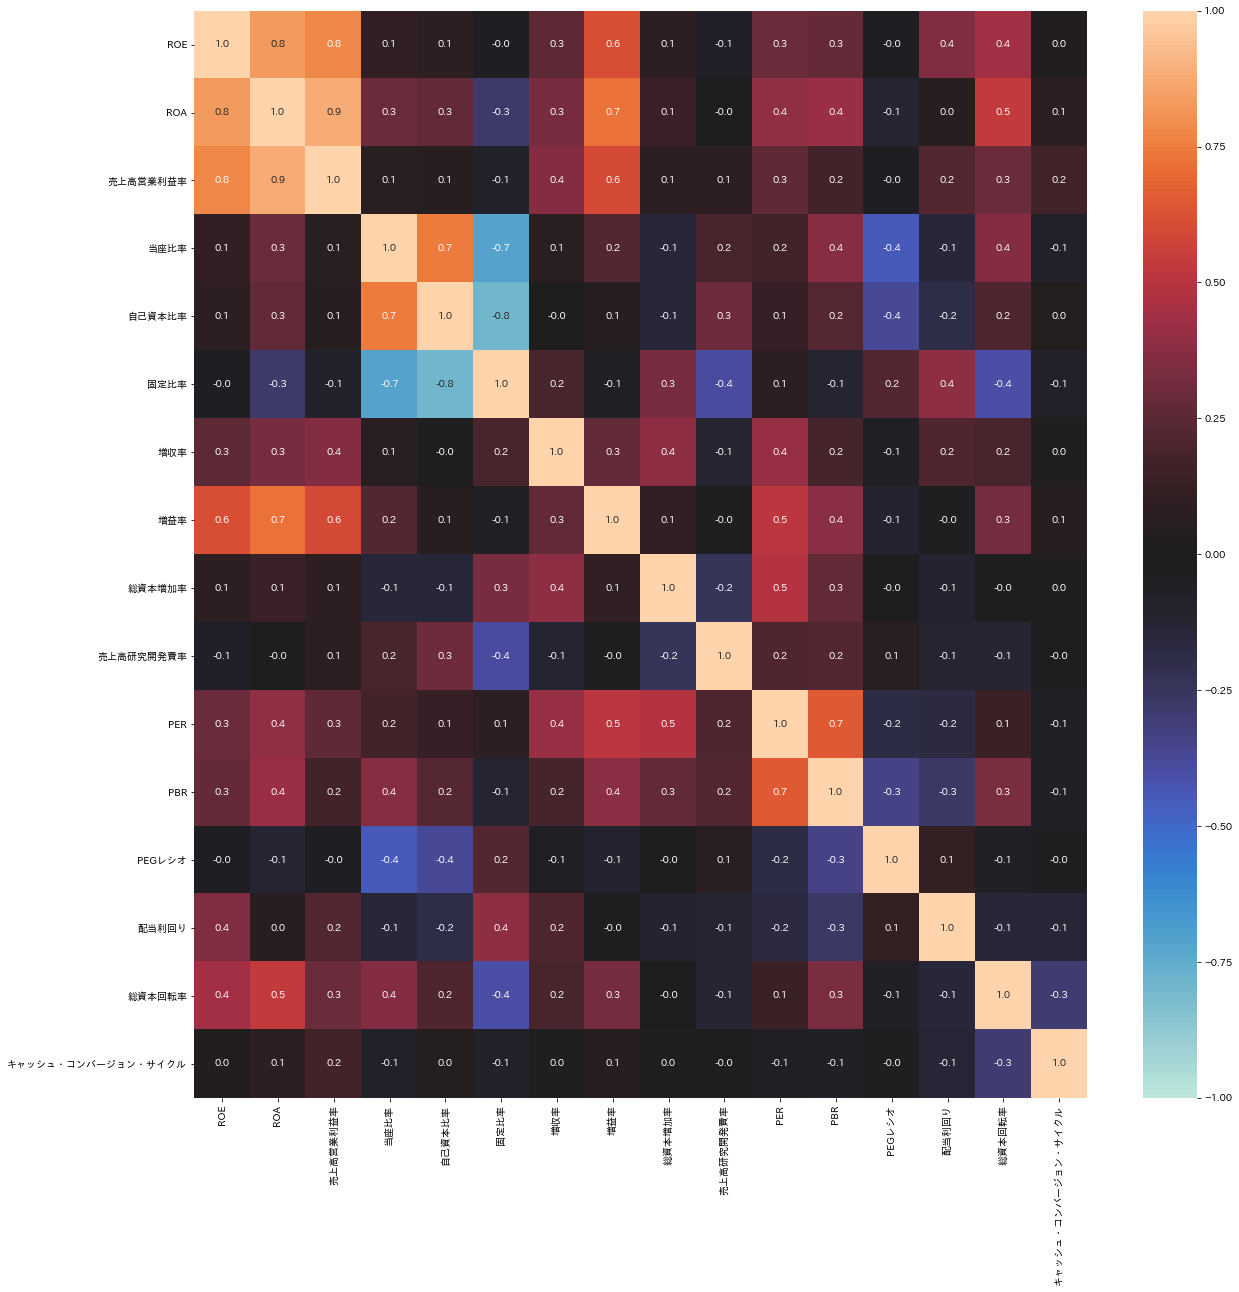

In [35]:
corr_mat = df.corr(method='pearson')

plt.figure(figsize = (20, 20))
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, 
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
#plt.savefig('ヒートマップ.png', dpi = 1000)
plt.show()

In [36]:
del df['PEGレシオ']
del df['キャッシュ・コンバージョン・サイクル']

df = df.dropna(axis = 0, how = 'any')
df
column = df['企業名'].tolist()
del df['企業名']

In [37]:
len(df)

36

In [38]:
# sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler

# データを変換する計算式を生成
sc = StandardScaler()
sc.fit(df)

# 実際にデータを変換
z = sc.transform(df)

print(z)
print(z.shape)

[[ 1.00179647e+00  1.07249223e+00  3.28891484e-01  3.37429812e-02
   2.07462701e-01 -9.19278306e-01 -6.47921878e-01  7.11079862e-01
  -6.76458556e-01  3.36401769e-02  1.60231181e-02  9.08844858e-01
  -7.52435109e-01  1.23190783e+00]
 [ 5.00256359e-01  6.37018122e-02  3.73531190e-01 -6.65386485e-01
  -3.14923634e-01  5.06226359e-01 -2.01755310e-01  1.70965900e-01
   2.56973067e-01  2.29739833e-01 -1.93519790e-01 -1.30918571e-01
   2.14810987e-01 -1.19247572e+00]
 [ 1.03041072e+00  1.99399983e-01  2.10142774e-01 -6.52206483e-01
  -8.35633998e-01  4.85982245e-01 -3.31420634e-01  5.47499857e-02
   1.34433352e-01  7.85890427e-02 -2.90068374e-01 -9.36232158e-02
  -3.54294793e-02 -1.37690880e-01]
 [-1.28965447e+00 -5.44303827e-01 -1.01612512e-01 -1.22867000e-01
  -7.33218523e-01  7.35690000e-01  4.50217611e-01 -4.64413064e-02
  -5.29293323e-01 -7.09968571e-01 -1.36690278e+00 -6.91173975e-01
   1.43268572e+00 -7.06929604e-01]
 [-2.25700312e-01 -4.84923967e-02  2.41749791e-01 -7.75541908e-01
  

In [39]:
"""
# 因子分析の実行
fa = FA(n_components = 4, rotation = 'varimax', max_iter = 5000) # モデルを定義
fitted = fa.fit_transform(z) # fitとtransformを一括処理

print(fitted)
print(fitted.shape)

factor_score = pd.DataFrame(fitted, columns = ['第1因子', '第2因子', '第3因子', '第4因子'])
factor_score
"""

fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax')
fa.fit(z)
factor_score = pd.DataFrame(fa.transform(z), columns = ['第1因子', '第2因子', '第3因子', '第4因子', '第5因子'])

factor_score.insert(0, '企業名', column)
factor_score

企業名      第1因子      第2因子      第3因子      第4因子      第5因子
0               富士通  1.377926  0.508390 -0.483069 -1.214663 -0.156910
1            トヨタ自動車  0.247703 -0.674020 -0.375705 -0.009929  0.377492
2             日立製作所  0.781345 -0.826247 -0.381998 -0.659150  0.290999
3              住友商事 -0.510541 -0.273528 -0.932484  1.681317 -0.684061
4              ローソン  0.057810 -1.395260  2.474586  0.283805 -0.366594
5             大日本印刷 -0.745009  1.186887  0.306962  1.151793 -0.347084
6              三菱電機  0.123664  1.036062 -0.587500 -0.026093  0.097732
7           コニカミノルタ -0.983410  0.231368 -1.531768  2.613522  1.020916
8              三井物産 -0.193234 -0.119948 -0.041287  0.898377 -0.740724
9               味の素  1.079844 -0.040535  0.128871 -0.866593 -0.203382
10            三井不動産 -0.152450 -1.417531 -0.004867 -0.489456 -0.519711
11           パナソニック  0.357897 -0.084888 -0.296571 -0.727275  0.813088
12             ＫＤＤＩ  1.821199 -0.071053 -0.387120  0.289445 -0.571583
13            三菱重工業 -0.127704 -0.909127  0.196832 -0.352192  0.265669
14          三菱総合研究所  0.762613  1.715920 -0.091507  0.207436 -0.625061
15              リコー -1.121649  0.461890 -1.598230 -0.235884  0.065067
16               丸紅 -0.102670 -0.895215 -0.492336  1.123352 -0.424274
17               東芝 -0.091305  0.308653 -0.692023  0.105394  0.317781
18             三菱商事 -0.138983 -0.346529  0.670626  1.340198 -0.721589
19              京セラ -1.097602  1.241072  0.370575  0.433792  0.262427
20               鈴木  0.491208  0.432156 -0.233282 -0.935886 -0.567414
21         アウトソーシング -0.484894 -0.980660  3.249862 -0.638794 -0.636642
22             日本航空 -4.545329  0.409800  0.032899 -1.137480 -0.853178
23            川崎重工業 -0.620940 -1.098190 -1.718658 -1.695762 -0.008058
24              ヤマト  0.490135  1.619144 -0.201795 -0.073649 -0.804631
25            ファンケル  0.673754  2.497369  1.522027 -0.487406 -0.868982
26             デンソー -0.814127  0.540244  0.733331  0.427834  1.630487
27             日本郵船  0.388690 -1.295755 -0.136325  2.992249 -0.098310
28              東洋紡  1.117799 -0.364301  0.490970 -0.199555  0.417399
29             エーザイ  0.350971  0.679433  1.210614 -0.123066  4.779800
30             住友林業  0.307695  0.217634 -0.729998 -0.728943 -0.893502
31             富士電機  0.451810  0.580104 -0.599215 -0.411261 -0.083428
32             日本通運  0.514447 -0.153196  0.136757 -0.208746 -0.566723
33      ヤマトホールディングス  0.994449  0.500974  0.068911 -0.595586 -0.708691
34            日産自動車 -0.514775 -1.009603 -0.802337 -1.598350  1.106413
35  アサヒグループホールディングス -0.146334 -2.211512  0.724253 -0.132795  0.005265

In [40]:
"""
# 変数Factor_loading_matrixに格納
Factor_loading_matrix = fa.components_.T

# データフレームに変換
DF = pd.DataFrame(Factor_loading_matrix, 
             columns = ["第1因子", "第2因子", "第3因子", "第4因子"],# "第5因子"],#, "第6因子", "第7因子", "第8因子"], 
             index = [df.columns])
#DF.to_csv('因子負荷量.csv', encoding = 'Shift_JIS')
DF
"""

DF = pd.DataFrame(fa.loadings_, 
             columns = ["第1因子", "第2因子", "第3因子", "第4因子", "第5因子"],#, "第6因子", "第7因子", "第8因子"], 
             index = [df.columns])
#DF.to_csv('因子負荷量.csv', encoding = 'Shift_JIS')
DF

第1因子      第2因子      第3因子      第4因子      第5因子
ROE        0.858657  0.045508  0.116630  0.219757 -0.051455
ROA        0.956890  0.223127  0.207807 -0.032708 -0.031338
売上高営業利益率   0.880622 -0.026833  0.075646  0.138940  0.110376
当座比率       0.088588  0.876711  0.124493  0.004902  0.014535
自己資本比率     0.050443  0.826827  0.018559 -0.035267  0.146919
固定比率      -0.145396 -0.867457  0.289667  0.292305 -0.186464
増収率        0.256808 -0.017948  0.448378  0.225389 -0.131697
増益率        0.664947  0.071988  0.318491 -0.059301  0.005706
総資本増加率     0.027654 -0.201453  0.591599 -0.053948 -0.195435
売上高研究開発費率 -0.020641  0.209832 -0.000586 -0.052255  0.973924
PER        0.233995  0.060538  0.905729 -0.085315  0.217509
PBR        0.241281  0.268653  0.582539 -0.204719  0.131006
配当利回り      0.148274 -0.171791 -0.125617  0.965069 -0.032426
総資本回転率     0.449355  0.360419  0.077794 -0.155891 -0.214507

In [41]:
factor_1_tmp = DF['第1因子'].tolist()
factor_2_tmp = DF['第2因子'].tolist()
factor_3_tmp = DF['第3因子'].tolist()
factor_4_tmp = DF['第4因子'].tolist()
factor_5_tmp = DF['第5因子'].tolist()

In [42]:
factor_1 = []
factor_2 = []
factor_3 = []
factor_4 = []
factor_5 = []

l = len(factor_1_tmp)

for i in range(l):
    factor_1.append(factor_1_tmp[i] * factor_1_tmp[i])
    
for i in range(l):
    factor_2.append(factor_2_tmp[i] * factor_2_tmp[i])
    
for i in range(l):
    factor_3.append(factor_3_tmp[i] * factor_3_tmp[i])
    
for i in range(l):
    factor_4.append(factor_4_tmp[i] * factor_4_tmp[i])
    
for i in range(l):
    factor_5.append(factor_5_tmp[i] * factor_5_tmp[i])

In [43]:
cr_1_tmp = sum(factor_1)
cr_2_tmp = sum(factor_2)
cr_3_tmp = sum(factor_3)
cr_4_tmp = sum(factor_4)
cr_5_tmp = sum(factor_5)

In [44]:
cr_1 = cr_1_tmp/14
cr_2 = cr_2_tmp/14
cr_3 = cr_3_tmp/14
cr_4 = cr_4_tmp/14
cr_5 = cr_5_tmp/14

In [45]:
ac_cr_1 = cr_1
ac_cr_2 = cr_1 + cr_2
ac_cr_3 = cr_1 + cr_2 + cr_3
ac_cr_4 = cr_1 + cr_2 + cr_3 + cr_4
ac_cr_5 = cr_1 + cr_2 + cr_3 + cr_4 + cr_5

In [46]:
ac_all = []
ac_all.append(ac_cr_1)
ac_all.append(ac_cr_2)
ac_all.append(ac_cr_3)
ac_all.append(ac_cr_4)
ac_all.append(ac_cr_5)

In [47]:
x_data = [1, 2, 3, 4, 5]

Text(0.5, 1.0, '累積寄与率のプロット')

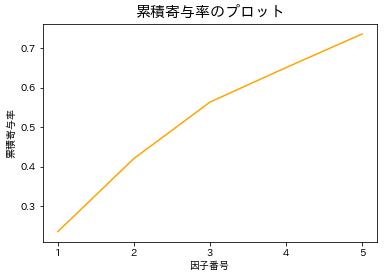

In [48]:
plt.plot(x_data, ac_all, color = 'orange')
plt.xlabel('因子番号')
plt.ylabel('累積寄与率')
plt.xticks([1, 2, 3, 4, 5])
plt.title('累積寄与率のプロット', fontsize = 15)
#plt.savefig('累積寄与率.png', dpi = 1500)

In [49]:
ac_all

[0.2361520082767825,
 0.42063012693765317,
 0.5632198059814395,
 0.6503758507818325,
 0.7352341109586885]

In [50]:
pandas_data = pd.DataFrame(fa.loadings_)

pandas_data =  pandas_data.round(3)
#pandas_data.to_csv('因子負荷量.csv', encoding='Shift_jis')

In [51]:
sns_data = np.array(pandas_data.values)

<AxesSubplot:title={'center':'因子負荷量'}>

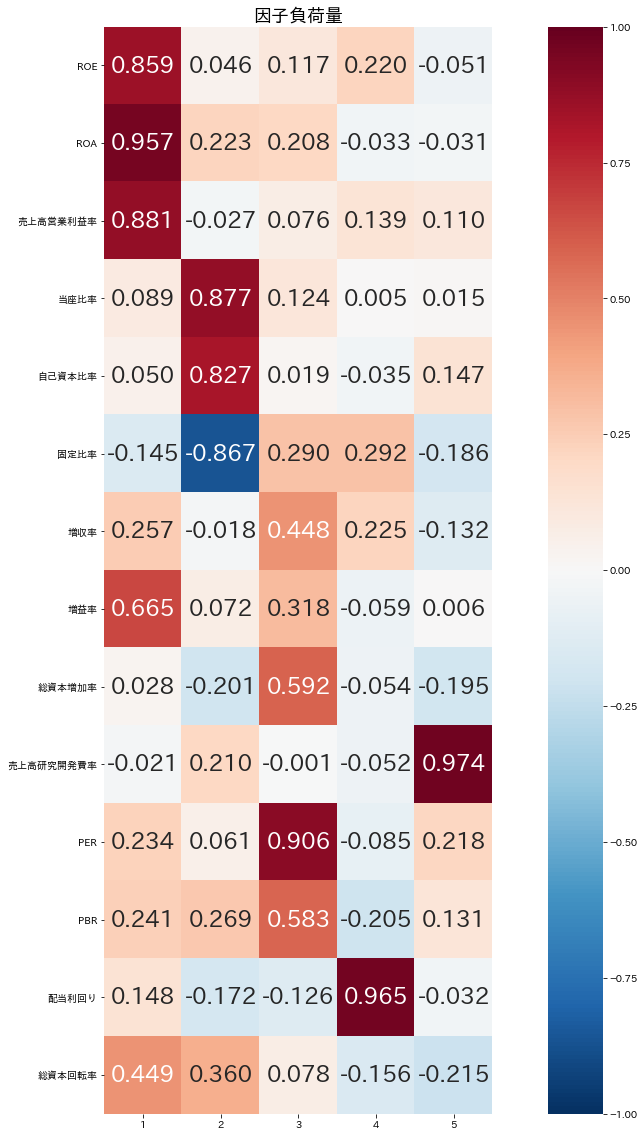

In [52]:
"""
plt.figure(figsize = (20,20))
sns.heatmap(data=Factor_loading_matrix,
                square=True, vmax=1, vmin=-1, center=0, annot=True, cmap='RdBu_r',yticklabels=df.columns)
#plt.savefig('因子負荷量.png', dpi = 1500)
"""

plt.figure(figsize = (20,20))
plt.title('因子負荷量', fontsize=18)
sns.heatmap(data=sns_data, 
            
                square=True, vmax=1, vmin=-1, center=0, annot=True, cmap='RdBu_r',xticklabels=[1, 2, 3, 4, 5], yticklabels=df.columns, annot_kws={'size':23}, fmt='.3f')

#plt.savefig('因子負荷量(ver1.2).png', dpi = 1500)

### スクリープロットによる因子数推定

In [54]:
df_data = df
df_data.corr()

ROE       ROA  売上高営業利益率      当座比率    自己資本比率      固定比率  \
ROE        1.000000  0.833775  0.777144  0.103709  0.083771 -0.042912   
ROA        0.833775  1.000000  0.880522  0.289327  0.269184 -0.274004   
売上高営業利益率   0.777144  0.880522  1.000000  0.063446  0.052216 -0.086654   
当座比率       0.103709  0.289327  0.063446  1.000000  0.742478 -0.711753   
自己資本比率     0.083771  0.269184  0.052216  0.742478  1.000000 -0.794683   
固定比率      -0.042912 -0.274004 -0.086654 -0.711753 -0.794683  1.000000   
増収率        0.251324  0.329142  0.365108  0.066899 -0.005567  0.190747   
増益率        0.610446  0.725524  0.597448  0.219644  0.056985 -0.059510   
総資本増加率     0.079783  0.147262  0.081017 -0.147254 -0.145052  0.330343   
売上高研究開発費率 -0.075105 -0.002272  0.089767  0.189202  0.303624 -0.386771   
PER        0.292960  0.398060  0.265522  0.167070  0.126315  0.088868   
PBR        0.275225  0.420900  0.165250  0.372619  0.233448 -0.124236   
配当利回り      0.352567  0.046948  0.224660 -0.143956 -0.194181  0.383381   
総資本回転率     0.440080  0.532996  0.292891  0.361947  0.215923 -0.400662   

                増収率       増益率    総資本増加率  売上高研究開発費率       PER       PBR  \
ROE        0.251324  0.610446  0.079783  -0.075105  0.292960  0.275225   
ROA        0.329142  0.725524  0.147262  -0.002272  0.398060  0.420900   
売上高営業利益率   0.365108  0.597448  0.081017   0.089767  0.265522  0.165250   
当座比率       0.066899  0.219644 -0.147254   0.189202  0.167070  0.372619   
自己資本比率    -0.005567  0.056985 -0.145052   0.303624  0.126315  0.233448   
固定比率       0.190747 -0.059510  0.330343  -0.386771  0.088868 -0.124236   
増収率        1.000000  0.268609  0.387642  -0.124430  0.407958  0.187446   
増益率        0.268609  1.000000  0.104227  -0.020664  0.508847  0.382485   
総資本増加率     0.387642  0.104227  1.000000  -0.240341  0.488301  0.269793   
売上高研究開発費率 -0.124430 -0.020664 -0.240341   1.000000  0.211276  0.221970   
PER        0.407958  0.508847  0.488301   0.211276  1.000000  0.656226   
PBR        0.187446  0.382485  0.269793   0.221970  0.656226  1.000000   
配当利回り      0.212784 -0.022676 -0.113528  -0.120749 -0.170151 -0.271521   
総資本回転率     0.190031  0.324198 -0.013561  -0.130068  0.139313  0.342334   

              配当利回り    総資本回転率  
ROE        0.352567  0.440080  
ROA        0.046948  0.532996  
売上高営業利益率   0.224660  0.292891  
当座比率      -0.143956  0.361947  
自己資本比率    -0.194181  0.215923  
固定比率       0.383381 -0.400662  
増収率        0.212784  0.190031  
増益率       -0.022676  0.324198  
総資本増加率    -0.113528 -0.013561  
売上高研究開発費率 -0.120749 -0.130068  
PER       -0.170151  0.139313  
PBR       -0.271521  0.342334  
配当利回り      1.000000 -0.144289  
総資本回転率    -0.144289  1.000000

Text(0, 0.5, '固有値')

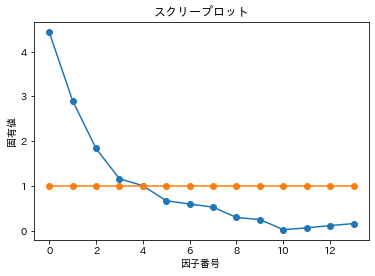

In [55]:
eigenvalue_one:np.ndarray = np.ones(14)
%matplotlib inline
plt.plot(np.linalg.eigvals(df_data.corr()), 'o-')
plt.plot(eigenvalue_one, 'o-')
plt.title('スクリープロット')
plt.xlabel('因子番号')
plt.ylabel('固有値')
#plt.savefig('スクリープロット(ver1.3).png', dpi = 1500)

In [56]:
sum = factor_score.sum(axis = 1)
factor_score.insert(6, '合計点', sum)

In [57]:
factor_score

企業名      第1因子      第2因子      第3因子      第4因子      第5因子  \
0               富士通  1.377926  0.508390 -0.483069 -1.214663 -0.156910   
1            トヨタ自動車  0.247703 -0.674020 -0.375705 -0.009929  0.377492   
2             日立製作所  0.781345 -0.826247 -0.381998 -0.659150  0.290999   
3              住友商事 -0.510541 -0.273528 -0.932484  1.681317 -0.684061   
4              ローソン  0.057810 -1.395260  2.474586  0.283805 -0.366594   
5             大日本印刷 -0.745009  1.186887  0.306962  1.151793 -0.347084   
6              三菱電機  0.123664  1.036062 -0.587500 -0.026093  0.097732   
7           コニカミノルタ -0.983410  0.231368 -1.531768  2.613522  1.020916   
8              三井物産 -0.193234 -0.119948 -0.041287  0.898377 -0.740724   
9               味の素  1.079844 -0.040535  0.128871 -0.866593 -0.203382   
10            三井不動産 -0.152450 -1.417531 -0.004867 -0.489456 -0.519711   
11           パナソニック  0.357897 -0.084888 -0.296571 -0.727275  0.813088   
12             ＫＤＤＩ  1.821199 -0.071053 -0.387120  0.289445 -0.571583   
13            三菱重工業 -0.127704 -0.909127  0.196832 -0.352192  0.265669   
14          三菱総合研究所  0.762613  1.715920 -0.091507  0.207436 -0.625061   
15              リコー -1.121649  0.461890 -1.598230 -0.235884  0.065067   
16               丸紅 -0.102670 -0.895215 -0.492336  1.123352 -0.424274   
17               東芝 -0.091305  0.308653 -0.692023  0.105394  0.317781   
18             三菱商事 -0.138983 -0.346529  0.670626  1.340198 -0.721589   
19              京セラ -1.097602  1.241072  0.370575  0.433792  0.262427   
20               鈴木  0.491208  0.432156 -0.233282 -0.935886 -0.567414   
21         アウトソーシング -0.484894 -0.980660  3.249862 -0.638794 -0.636642   
22             日本航空 -4.545329  0.409800  0.032899 -1.137480 -0.853178   
23            川崎重工業 -0.620940 -1.098190 -1.718658 -1.695762 -0.008058   
24              ヤマト  0.490135  1.619144 -0.201795 -0.073649 -0.804631   
25            ファンケル  0.673754  2.497369  1.522027 -0.487406 -0.868982   
26             デンソー -0.814127  0.540244  0.733331  0.427834  1.630487   
27             日本郵船  0.388690 -1.295755 -0.136325  2.992249 -0.098310   
28              東洋紡  1.117799 -0.364301  0.490970 -0.199555  0.417399   
29             エーザイ  0.350971  0.679433  1.210614 -0.123066  4.779800   
30             住友林業  0.307695  0.217634 -0.729998 -0.728943 -0.893502   
31             富士電機  0.451810  0.580104 -0.599215 -0.411261 -0.083428   
32             日本通運  0.514447 -0.153196  0.136757 -0.208746 -0.566723   
33      ヤマトホールディングス  0.994449  0.500974  0.068911 -0.595586 -0.708691   
34            日産自動車 -0.514775 -1.009603 -0.802337 -1.598350  1.106413   
35  アサヒグループホールディングス -0.146334 -2.211512  0.724253 -0.132795  0.005265   

         合計点  
0   0.031673  
1  -0.434459  
2  -0.795050  
3  -0.719297  
4   1.054346  
5   1.553550  
6   0.643865  
7   1.350627  
8  -0.196817  
9   0.098206  
10 -2.584015  
11  0.062250  
12  1.080888  
13 -0.926522  
14  1.969401  
15 -2.428807  
16 -0.791143  
17 -0.051500  
18  0.803724  
19  1.210264  
20 -0.813219  
21  0.508871  
22 -6.093288  
23 -5.141608  
24  1.029204  
25  3.336762  
26  2.517769  
27  1.850548  
28  1.462312  
29  6.897751  
30 -1.827115  
31 -0.061990  
32 -0.277461  
33  0.260057  
34 -2.818652  
35 -1.761124

In [58]:
Score_rank = factor_score.sort_values('合計点', ascending = False)
Score_rank = Score_rank.reset_index()
del Score_rank['index']
Score_rank
#Score_rank.to_csv('因子得点合計値(調整前).csv', encoding = 'Shift_JIS')

企業名      第1因子      第2因子      第3因子      第4因子      第5因子  \
0              エーザイ  0.350971  0.679433  1.210614 -0.123066  4.779800   
1             ファンケル  0.673754  2.497369  1.522027 -0.487406 -0.868982   
2              デンソー -0.814127  0.540244  0.733331  0.427834  1.630487   
3           三菱総合研究所  0.762613  1.715920 -0.091507  0.207436 -0.625061   
4              日本郵船  0.388690 -1.295755 -0.136325  2.992249 -0.098310   
5             大日本印刷 -0.745009  1.186887  0.306962  1.151793 -0.347084   
6               東洋紡  1.117799 -0.364301  0.490970 -0.199555  0.417399   
7           コニカミノルタ -0.983410  0.231368 -1.531768  2.613522  1.020916   
8               京セラ -1.097602  1.241072  0.370575  0.433792  0.262427   
9              ＫＤＤＩ  1.821199 -0.071053 -0.387120  0.289445 -0.571583   
10             ローソン  0.057810 -1.395260  2.474586  0.283805 -0.366594   
11              ヤマト  0.490135  1.619144 -0.201795 -0.073649 -0.804631   
12             三菱商事 -0.138983 -0.346529  0.670626  1.340198 -0.721589   
13             三菱電機  0.123664  1.036062 -0.587500 -0.026093  0.097732   
14         アウトソーシング -0.484894 -0.980660  3.249862 -0.638794 -0.636642   
15      ヤマトホールディングス  0.994449  0.500974  0.068911 -0.595586 -0.708691   
16              味の素  1.079844 -0.040535  0.128871 -0.866593 -0.203382   
17           パナソニック  0.357897 -0.084888 -0.296571 -0.727275  0.813088   
18              富士通  1.377926  0.508390 -0.483069 -1.214663 -0.156910   
19               東芝 -0.091305  0.308653 -0.692023  0.105394  0.317781   
20             富士電機  0.451810  0.580104 -0.599215 -0.411261 -0.083428   
21             三井物産 -0.193234 -0.119948 -0.041287  0.898377 -0.740724   
22             日本通運  0.514447 -0.153196  0.136757 -0.208746 -0.566723   
23           トヨタ自動車  0.247703 -0.674020 -0.375705 -0.009929  0.377492   
24             住友商事 -0.510541 -0.273528 -0.932484  1.681317 -0.684061   
25               丸紅 -0.102670 -0.895215 -0.492336  1.123352 -0.424274   
26            日立製作所  0.781345 -0.826247 -0.381998 -0.659150  0.290999   
27               鈴木  0.491208  0.432156 -0.233282 -0.935886 -0.567414   
28            三菱重工業 -0.127704 -0.909127  0.196832 -0.352192  0.265669   
29  アサヒグループホールディングス -0.146334 -2.211512  0.724253 -0.132795  0.005265   
30             住友林業  0.307695  0.217634 -0.729998 -0.728943 -0.893502   
31              リコー -1.121649  0.461890 -1.598230 -0.235884  0.065067   
32            三井不動産 -0.152450 -1.417531 -0.004867 -0.489456 -0.519711   
33            日産自動車 -0.514775 -1.009603 -0.802337 -1.598350  1.106413   
34            川崎重工業 -0.620940 -1.098190 -1.718658 -1.695762 -0.008058   
35             日本航空 -4.545329  0.409800  0.032899 -1.137480 -0.853178   

         合計点  
0   6.897751  
1   3.336762  
2   2.517769  
3   1.969401  
4   1.850548  
5   1.553550  
6   1.462312  
7   1.350627  
8   1.210264  
9   1.080888  
10  1.054346  
11  1.029204  
12  0.803724  
13  0.643865  
14  0.508871  
15  0.260057  
16  0.098206  
17  0.062250  
18  0.031673  
19 -0.051500  
20 -0.061990  
21 -0.196817  
22 -0.277461  
23 -0.434459  
24 -0.719297  
25 -0.791143  
26 -0.795050  
27 -0.813219  
28 -0.926522  
29 -1.761124  
30 -1.827115  
31 -2.428807  
32 -2.584015  
33 -2.818652  
34 -5.141608  
35 -6.093288

In [59]:
dict = {'企業名': l_comp, 'ROE': ROE, 'ROA': ROA, '売上高営業利益率': p, '当座比率': safe_1, '自己資本比率': safe_2, '固定比率': safe_3, '増収率': g_1, '増益率': g_2, '総資本増加率': g_3, '売上高研究開発費率': g_4, 'PER': PER, 'PBR': PBR, 'PEGレシオ': PEG_ratio, '配当利回り': c, '総資本回転率': e, 'キャッシュ・コンバージョン・サイクル': CCC}
dataframe = pd.DataFrame(dict)
for i in range(len(del_comp_list)):
    dataframe.drop(del_comp_list[-(i+1)], inplace=True)

In [60]:
exception_1 = dataframe['PEGレシオ'].tolist()
exception_2 = dataframe['キャッシュ・コンバージョン・サイクル'].tolist()

In [61]:
del exception_1[35]
del exception_1[31]
del exception_2[35]
del exception_2[31]

In [62]:
factor_1 = factor_score['第1因子'].tolist()
factor_2 = factor_score['第2因子'].tolist()
factor_3 = factor_score['第3因子'].tolist()
sum_tmp = factor_score['合計点'].tolist()

In [63]:
length = len(exception_1)
Sum_tmp = []
Sum = []

In [64]:
#PEGレシオの得点調整

for i in range(length):
    if np.isnan(exception_1[i]):
        Sum_tmp.append(sum_tmp[i])
        
    else:
        if exception_1[i] < 0:
            Sum_tmp.append(sum_tmp[i])
            
        elif 0 <= exception_1[i] <= 1:
            Sum_tmp.append(sum_tmp[i] + (abs(factor_3[i]) * 0.1))
            
        elif 2 <= exception_1[i]:
            Sum_tmp.append(sum_tmp[i] - (abs(factor_3[i]) * 0.1))
            
        else:
            Sum_tmp.append(sum_tmp[i])
            
#キャッシュ・コンバージョン・サイクルの得点調整

for i in range(length):
    if np.isnan(exception_2[i]):
        Sum.append(Sum_tmp[i])
        
    else:
        if exception_2[i] <= 50:
            Sum.append(Sum_tmp[i] + (((abs(factor_1[i]) + abs(factor_2[i])) / 2) * 0.1))
            
        elif 100 <= exception_2[i]:
            Sum.append(Sum_tmp[i] - (((abs(factor_1[i]) + abs(factor_2[i])) / 2) * 0.1))
                       
        else:
            Sum.append(Sum_tmp[i])

In [65]:
factor_score.insert(7, '合計点(得点調整後)', Sum)

In [66]:
factor_score

企業名      第1因子      第2因子      第3因子      第4因子      第5因子  \
0               富士通  1.377926  0.508390 -0.483069 -1.214663 -0.156910   
1            トヨタ自動車  0.247703 -0.674020 -0.375705 -0.009929  0.377492   
2             日立製作所  0.781345 -0.826247 -0.381998 -0.659150  0.290999   
3              住友商事 -0.510541 -0.273528 -0.932484  1.681317 -0.684061   
4              ローソン  0.057810 -1.395260  2.474586  0.283805 -0.366594   
5             大日本印刷 -0.745009  1.186887  0.306962  1.151793 -0.347084   
6              三菱電機  0.123664  1.036062 -0.587500 -0.026093  0.097732   
7           コニカミノルタ -0.983410  0.231368 -1.531768  2.613522  1.020916   
8              三井物産 -0.193234 -0.119948 -0.041287  0.898377 -0.740724   
9               味の素  1.079844 -0.040535  0.128871 -0.866593 -0.203382   
10            三井不動産 -0.152450 -1.417531 -0.004867 -0.489456 -0.519711   
11           パナソニック  0.357897 -0.084888 -0.296571 -0.727275  0.813088   
12             ＫＤＤＩ  1.821199 -0.071053 -0.387120  0.289445 -0.571583   
13            三菱重工業 -0.127704 -0.909127  0.196832 -0.352192  0.265669   
14          三菱総合研究所  0.762613  1.715920 -0.091507  0.207436 -0.625061   
15              リコー -1.121649  0.461890 -1.598230 -0.235884  0.065067   
16               丸紅 -0.102670 -0.895215 -0.492336  1.123352 -0.424274   
17               東芝 -0.091305  0.308653 -0.692023  0.105394  0.317781   
18             三菱商事 -0.138983 -0.346529  0.670626  1.340198 -0.721589   
19              京セラ -1.097602  1.241072  0.370575  0.433792  0.262427   
20               鈴木  0.491208  0.432156 -0.233282 -0.935886 -0.567414   
21         アウトソーシング -0.484894 -0.980660  3.249862 -0.638794 -0.636642   
22             日本航空 -4.545329  0.409800  0.032899 -1.137480 -0.853178   
23            川崎重工業 -0.620940 -1.098190 -1.718658 -1.695762 -0.008058   
24              ヤマト  0.490135  1.619144 -0.201795 -0.073649 -0.804631   
25            ファンケル  0.673754  2.497369  1.522027 -0.487406 -0.868982   
26             デンソー -0.814127  0.540244  0.733331  0.427834  1.630487   
27             日本郵船  0.388690 -1.295755 -0.136325  2.992249 -0.098310   
28              東洋紡  1.117799 -0.364301  0.490970 -0.199555  0.417399   
29             エーザイ  0.350971  0.679433  1.210614 -0.123066  4.779800   
30             住友林業  0.307695  0.217634 -0.729998 -0.728943 -0.893502   
31             富士電機  0.451810  0.580104 -0.599215 -0.411261 -0.083428   
32             日本通運  0.514447 -0.153196  0.136757 -0.208746 -0.566723   
33      ヤマトホールディングス  0.994449  0.500974  0.068911 -0.595586 -0.708691   
34            日産自動車 -0.514775 -1.009603 -0.802337 -1.598350  1.106413   
35  アサヒグループホールディングス -0.146334 -2.211512  0.724253 -0.132795  0.005265   

         合計点  合計点(得点調整後)  
0   0.031673    0.174296  
1  -0.434459   -0.480545  
2  -0.795050   -0.837230  
3  -0.719297   -0.626049  
4   1.054346    1.054346  
5   1.553550    1.553550  
6   0.643865    0.585879  
7   1.350627    1.350627  
8  -0.196817   -0.185287  
9   0.098206    0.111093  
10 -2.584015   -2.663001  
11  0.062250    0.054732  
12  1.080888    1.080888  
13 -0.926522   -0.926522  
14  1.969401    1.978552  
15 -2.428807   -2.268984  
16 -0.791143   -0.741249  
17 -0.051500   -0.002295  
18  0.803724    0.803724  
19  1.210264    1.093330  
20 -0.813219   -0.813219  
21  0.508871    0.582149  
22 -6.093288   -5.842242  
23 -5.141608   -5.227565  
24  1.029204    0.923740  
25  3.336762    3.178206  
26  2.517769    2.512154  
27  1.850548    1.934771  
28  1.462312    1.388207  
29  6.897751    6.897751  
30 -1.827115   -1.900115  
31 -0.061990   -0.053665  
32 -0.277461   -0.277461  
33  0.260057    0.341719  
34 -2.818652   -2.662200  
35 -1.761124   -1.643231

In [67]:
Score_rank = factor_score.sort_values('合計点(得点調整後)', ascending = False)
Score_rank = Score_rank.reset_index()
del Score_rank['index']
Score_rank
#Score_rank.to_csv('因子得点合計値(調整後)(ver1.1).csv', encoding = 'Shift_JIS')

企業名      第1因子      第2因子      第3因子      第4因子      第5因子  \
0              エーザイ  0.350971  0.679433  1.210614 -0.123066  4.779800   
1             ファンケル  0.673754  2.497369  1.522027 -0.487406 -0.868982   
2              デンソー -0.814127  0.540244  0.733331  0.427834  1.630487   
3           三菱総合研究所  0.762613  1.715920 -0.091507  0.207436 -0.625061   
4              日本郵船  0.388690 -1.295755 -0.136325  2.992249 -0.098310   
5             大日本印刷 -0.745009  1.186887  0.306962  1.151793 -0.347084   
6               東洋紡  1.117799 -0.364301  0.490970 -0.199555  0.417399   
7           コニカミノルタ -0.983410  0.231368 -1.531768  2.613522  1.020916   
8               京セラ -1.097602  1.241072  0.370575  0.433792  0.262427   
9              ＫＤＤＩ  1.821199 -0.071053 -0.387120  0.289445 -0.571583   
10             ローソン  0.057810 -1.395260  2.474586  0.283805 -0.366594   
11              ヤマト  0.490135  1.619144 -0.201795 -0.073649 -0.804631   
12             三菱商事 -0.138983 -0.346529  0.670626  1.340198 -0.721589   
13             三菱電機  0.123664  1.036062 -0.587500 -0.026093  0.097732   
14         アウトソーシング -0.484894 -0.980660  3.249862 -0.638794 -0.636642   
15      ヤマトホールディングス  0.994449  0.500974  0.068911 -0.595586 -0.708691   
16              富士通  1.377926  0.508390 -0.483069 -1.214663 -0.156910   
17              味の素  1.079844 -0.040535  0.128871 -0.866593 -0.203382   
18           パナソニック  0.357897 -0.084888 -0.296571 -0.727275  0.813088   
19               東芝 -0.091305  0.308653 -0.692023  0.105394  0.317781   
20             富士電機  0.451810  0.580104 -0.599215 -0.411261 -0.083428   
21             三井物産 -0.193234 -0.119948 -0.041287  0.898377 -0.740724   
22             日本通運  0.514447 -0.153196  0.136757 -0.208746 -0.566723   
23           トヨタ自動車  0.247703 -0.674020 -0.375705 -0.009929  0.377492   
24             住友商事 -0.510541 -0.273528 -0.932484  1.681317 -0.684061   
25               丸紅 -0.102670 -0.895215 -0.492336  1.123352 -0.424274   
26               鈴木  0.491208  0.432156 -0.233282 -0.935886 -0.567414   
27            日立製作所  0.781345 -0.826247 -0.381998 -0.659150  0.290999   
28            三菱重工業 -0.127704 -0.909127  0.196832 -0.352192  0.265669   
29  アサヒグループホールディングス -0.146334 -2.211512  0.724253 -0.132795  0.005265   
30             住友林業  0.307695  0.217634 -0.729998 -0.728943 -0.893502   
31              リコー -1.121649  0.461890 -1.598230 -0.235884  0.065067   
32            日産自動車 -0.514775 -1.009603 -0.802337 -1.598350  1.106413   
33            三井不動産 -0.152450 -1.417531 -0.004867 -0.489456 -0.519711   
34            川崎重工業 -0.620940 -1.098190 -1.718658 -1.695762 -0.008058   
35             日本航空 -4.545329  0.409800  0.032899 -1.137480 -0.853178   

         合計点  合計点(得点調整後)  
0   6.897751    6.897751  
1   3.336762    3.178206  
2   2.517769    2.512154  
3   1.969401    1.978552  
4   1.850548    1.934771  
5   1.553550    1.553550  
6   1.462312    1.388207  
7   1.350627    1.350627  
8   1.210264    1.093330  
9   1.080888    1.080888  
10  1.054346    1.054346  
11  1.029204    0.923740  
12  0.803724    0.803724  
13  0.643865    0.585879  
14  0.508871    0.582149  
15  0.260057    0.341719  
16  0.031673    0.174296  
17  0.098206    0.111093  
18  0.062250    0.054732  
19 -0.051500   -0.002295  
20 -0.061990   -0.053665  
21 -0.196817   -0.185287  
22 -0.277461   -0.277461  
23 -0.434459   -0.480545  
24 -0.719297   -0.626049  
25 -0.791143   -0.741249  
26 -0.813219   -0.813219  
27 -0.795050   -0.837230  
28 -0.926522   -0.926522  
29 -1.761124   -1.643231  
30 -1.827115   -1.900115  
31 -2.428807   -2.268984  
32 -2.818652   -2.662200  
33 -2.584015   -2.663001  
34 -5.141608   -5.227565  
35 -6.093288   -5.842242

In [ ]:
l_comp